# GMM and EM
Gaussian Mixture Models and Expectation Maximization.

Based on my data mining notebook DM573/EM.

    2:8
    cyto is 2/10 = 20%
    odds = 2/8 = .25 and log2 = -4.5
    given odds .25, reconstruct 0.25:1 
    cyto is 0.25 / (1+0.25) = 20%

    1:1
    cyto is 1/2 = 50%
    odds = 1/1 = 1 and log = 0
    given oods 1 reconstruct 1:1
    cyto is 1 / (1+1) = 50%

    8:2
    cyto is 8/10 = 80%
    odds = 8/2 = 4 and log2 = 2
    given odds 4, reconstruct 4:1
    cyto is 4 / (1+4) = 80%

In [8]:
import numpy as np
from matplotlib import pyplot
from sklearn.mixture import GaussianMixture

In [9]:
try:
    from google.colab import drive
    IN_COLAB = True
    print('Running on CoLab')
    PATH='/content/drive/'
    drive.mount(PATH)
    DATA_DIR=PATH+'My Drive/data/Localization/TrainTest/'  # must end in "/"
except:
    IN_COLAB = False
    DATA_DIR = 'D:/Adjeroh/Localization/TrainTest/'   # Windows
    DATA_DIR = '/Users/jasonmiller/WVU/Localization/TrainTest/'    # Mac
print(DATA_DIR)

/Users/jasonmiller/WVU/Localization/TrainTest/


In [10]:
GENES_FILE =    'CNRCI_noncoding_train_genes.csv'
RCI_FILE =      'CNRCI_noncoding_train_RCI.gc42.csv'

In [11]:
def get_ordered_list():
    ordered_list = \
    ['A549','H1.hESC','HeLa.S3','HepG2','HT1080','HUVEC','MCF.7','NCI.H460','NHEK',\
     'SK.MEL.5','SK.N.DZ','SK.N.SH','GM12878','K562','IMR.90']
    return ordered_list
all_cell_lines = get_ordered_list()

CELL_LINE = 0
print('Cell line for today',CELL_LINE,all_cell_lines[CELL_LINE])
EXCLUSIONS = [1,7]
for c in EXCLUSIONS:
    print('Exclude cell line',c,all_cell_lines[c])

Cell line for today 0 A549
Exclude cell line 1 H1.hESC
Exclude cell line 7 NCI.H460


In [12]:
class RCI_Loader():
    def __init__(self):
        self.cache=dict() 
        
    def load_gene_rci_values(self,filepath,cell_line):
        '''
        Load from RCI csv file.
        Return dict with keys=gene:str and values=RCI:float.
        '''
        gene_to_rci = {}
        overall_sum = 0
        with open (filepath,'r') as handle:
            header = None
            for row in handle:
                if header is None:
                    header = row # skip file's header line
                else:
                    line = row.strip()
                    fields = line.split(',')
                    gene_id = fields.pop(0)
                    rci_str = fields[cell_line]
                    if rci_str != "nan":
                        rci_val = float(rci_str)
                        gene_to_rci[gene_id] = rci_val
        return gene_to_rci

In [18]:
def plot(X,num_bins=100):
    pyplot.hist(X, bins=num_bins, density=True)
    pyplot.show()

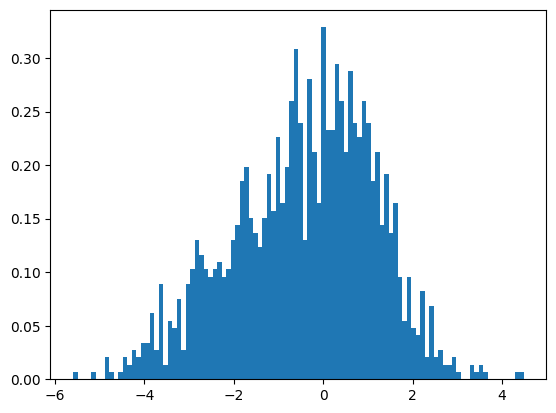

In [20]:
filename = DATA_DIR + RCI_FILE
loader = RCI_Loader()
gene_to_rci = loader.load_gene_rci_values(filename,CELL_LINE)
values = list(gene_to_rci.values())
plot(values)

min max 0.020618597320740915 22.523825907993498


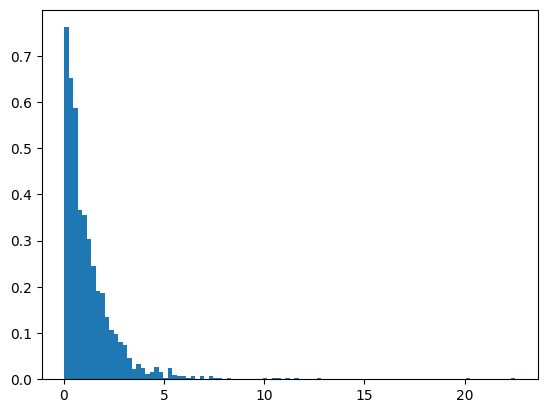

In [23]:
antilogs = np.power(2,values)
print('min max',min(antilogs),max(antilogs))
plot(antilogs)

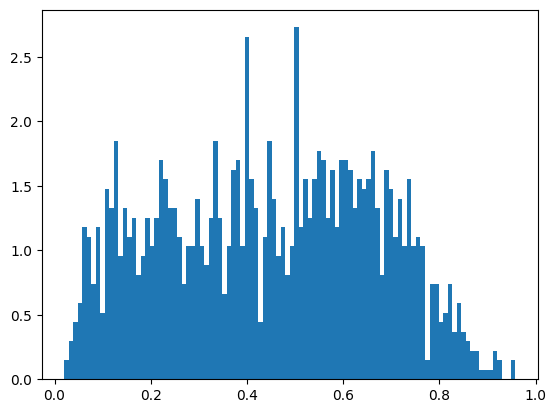

In [24]:
cyto_pct = [x/(1+x) for x in antilogs]
plot(cyto_pct)

In [25]:
def show_gmm(model,X):
    print(model)
    print('AIC',model.aic(X),'BIC',model.bic(X),'score',model.score(X))
    for i in range(model.n_components):
        print('Gaussian',i,'mean=',model.means_[i],
            'wgt=',model.weights_[i], 'cov=',model.covariances_[i])

values = np.array(cyto_pct)
values = values.reshape(-1, 1)
model = GaussianMixture(n_components=1, verbose=0, covariance_type='spherical') 
model.fit(values)
show_gmm(model,values)
model = GaussianMixture(n_components=2, verbose=0, covariance_type='spherical') 
model.fit(values)
show_gmm(model,values)

GaussianMixture(covariance_type='spherical')
AIC -269.0182802362439 BIC -258.46378478298095 score 0.09433941957022941
Gaussian 0 mean= [0.44521692] wgt= 1.0 cov= 0.048483328621034105
GaussianMixture(covariance_type='spherical', n_components=2)
AIC -417.9467372260281 BIC -391.5604985928707 score 0.14787378618729374
Gaussian 0 mean= [0.24989606] wgt= 0.45742420893236035 cov= 0.015454337613182273
Gaussian 1 mean= [0.60988421] wgt= 0.5425757910676398 cov= 0.017050490024303783
